## AIVLE 1차 미니프로젝트 : '서울시 생활정보 기반 대중교통 수요 분석 '

제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정
* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 


In [3]:
import pandas as pd

In [4]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [5]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [6]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [7]:
df_seoul_bus_station = pd.read_csv('seoul_buses.csv', sep=",", encoding = 'UTF-8').drop('Unnamed: 0',axis=1)
df_seoul_moving = pd.read_csv('total_sum_mean.csv', sep=",", encoding = 'UTF-8').drop('Unnamed: 0',axis=1)
df_seoul_business = pd.read_csv('seoul_business.csv', sep=",", encoding = 'UTF-8').drop('Unnamed: 0',axis=1)
df_seoul_people = pd.read_csv('seoul_people.csv', sep=",", encoding = 'UTF-8').drop('Unnamed: 0',axis=1)

In [8]:
df_seoul_bus_station.head()

,자치구,정류장수,노선수,총승하차객수,승차평균승객수,하차평균승객수
0,강남구,501,98,13557423.0,123.257234,116.824633
1,강동구,367,22,4976487.0,91.578944,89.588445
2,강북구,410,71,7856134.0,126.465395,122.036345
3,강서구,567,51,7944456.0,86.932767,86.542122
4,관악구,466,83,11882999.0,134.337116,137.566391


In [9]:
df = pd.merge(standard,df_seoul_people,how='inner', on='자치구')
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')
df = pd.merge(df,df_seoul_bus_station,how='inner', on='자치구')
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [10]:
df.head(7)

,도착 시군구 코드,자치구,남자,여자,합계,택시운송업.1,두발미용업.1,커피전문점.1,일반 교과 학원.1,남녀용 겉옷 및 셔츠 도매업.1,정류장수,노선수,총승하차객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,종로구,71890,78563,150453,215,480,3613,382,962,356,105,8850208.0,123.306727,119.111592,60.151307,41.911289,29075578,20258827.46
1,11020,중구,63495,68298,131793,235,816,3542,175,24248,173,102,6189202.0,113.678089,110.511501,58.450528,44.128266,28733286,21692705.49
2,11030,용산구,109826,117280,227106,523,777,2076,573,317,326,69,6918152.0,119.962938,117.447907,58.494740,34.245515,26487237,15506848.68
3,11040,성동구,137620,147146,284766,2527,851,1859,1494,1572,432,58,4706296.0,90.524859,88.912994,58.879851,39.001257,27279447,18069555.27
4,11050,광진구,167562,183618,351180,1744,1337,1887,1646,687,274,43,4760356.0,106.767427,107.460375,61.807174,42.697635,26804906,18517366.67
5,11060,동대문구,174120,185753,359873,2093,891,1472,984,976,307,74,8957488.0,127.490390,124.570504,60.745357,37.893985,28277328,17639877.61
6,11070,중랑구,189462,198008,387470,6262,1108,1037,1045,284,384,51,6394542.0,77.186457,76.421413,65.215023,38.634336,25059916,14845861.77


In [11]:
df_table = pd.read_csv('table.csv').drop('Unnamed: 0',axis=1)

In [12]:
df_table.drop('총노선수',axis=1,inplace=True)

In [13]:
df = pd.read_excel('찐노선수.xlsx').drop('Unnamed: 0',axis=1)
df.columns=['자치구','총노선수']
df_table = pd.merge(df_table,df,on='자치구')

In [14]:
df_table.head()

,자치구,정류장수,노선수,넓이,평균 이동 시간(분),이동인구(합),총노선수
0,중구,173,102,9.96,1478635,7614020.16,130
1,광진구,274,43,17.06,1704741,9902446.34,50
2,동대문구,307,74,14.22,1663216,8293191.64,79
3,양천구,319,57,17.41,1675772,8155105.75,76
4,용산구,326,69,21.87,1643111,6634596.40,87


## 2.단변량 분석


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Apple Gothic')
sns.set(font="AppleGothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')


### 1) 자치구 내에서 이동한 사람들의 평균 이동 시간. 


- **변수의 비지니스 의미**

    - 같은 자치구내에서의 평균 이동 시간이 크다는 것은 자치구의 면적이 넓거나 정류장가 많아 정차 횟수가 잦음을 예상할 수 있으며, 또한 노선의 형태가 고르게 분포 되지 못함을 예상 할 수 있다.

    - 자치구의 넓이가 클 수록 정류장의 수가 많아지고, 이동 거리 또한 늘어나게 된다. 따라서 평균 이동 시간이 넓이와 관계가 있을 것이라 판단된다.

    - 정류장수가 증가함에 따라서 정차 빈도가 잦아 평균 이동 시간이 넓이와 관계가 있을 것이라 판단된다.
    
- **전처리 사항**
    -  자치구별 넓이, 자치구별 평균 이동 시간의 합, 자치구별 정류장 수를 자치구를 기준으로 merge 하였다.
    
- **추가 분석해볼 사항 도출**
    - 추가로 교통량 데이터를 추가하여 평균 이동 시간과 연관이 있는지 확인하여 버스 노선 추가가 유의미한 해결 방안이 될 수 있는지 판단해야한다.





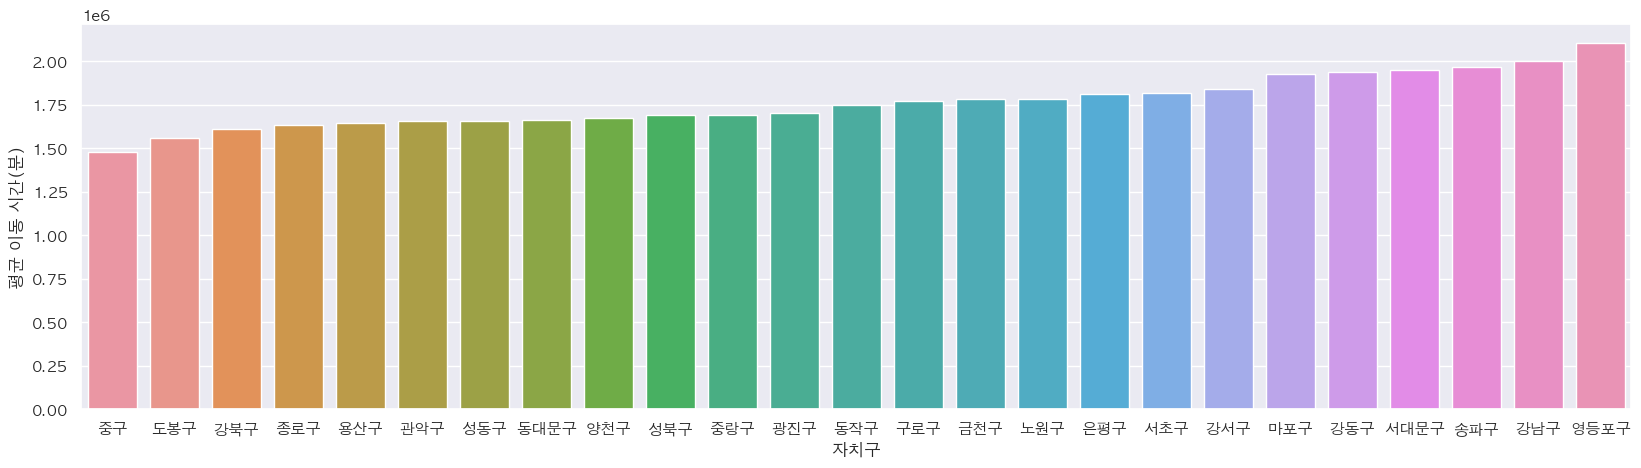

In [16]:

plt.figure(figsize=(20,5))
df_table = df_table.sort_values('평균 이동 시간(분)')
sns.barplot(x='자치구', y='평균 이동 시간(분)',data=df_table)
plt.savefig('자치구,평균 이동 시간(분).png')

### 2)

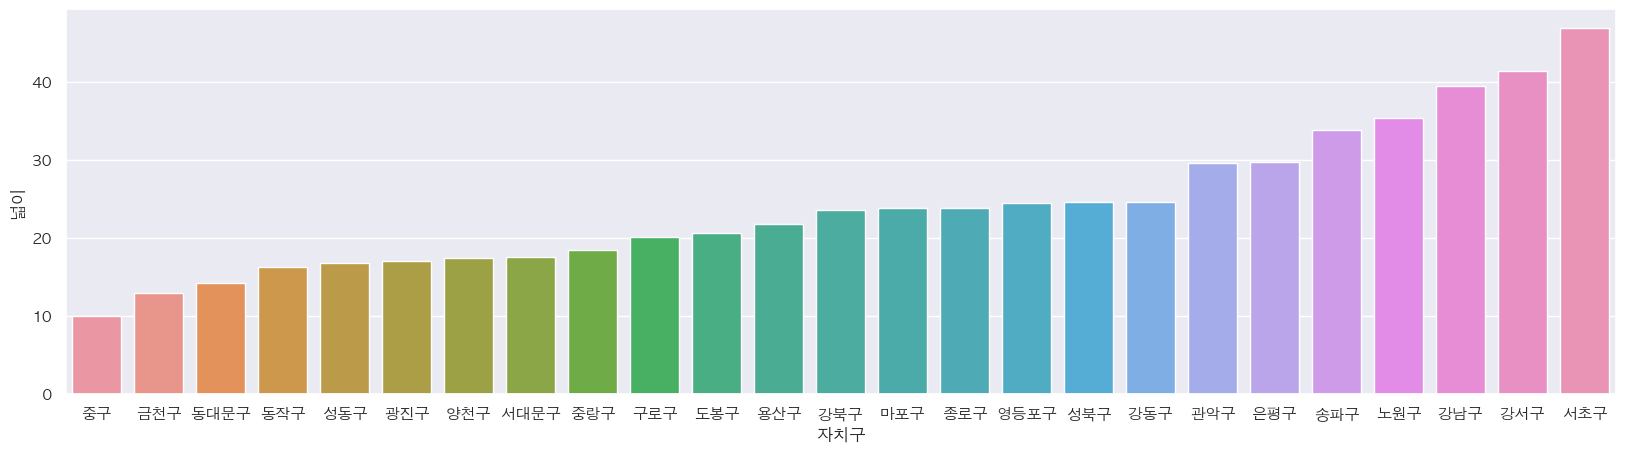

In [17]:

plt.figure(figsize=(20,5))
df_table = df_table.sort_values('넓이')
sns.barplot(x='자치구', y='넓이',data=df_table)
plt.savefig('자치구,넓이.png')

### 3)

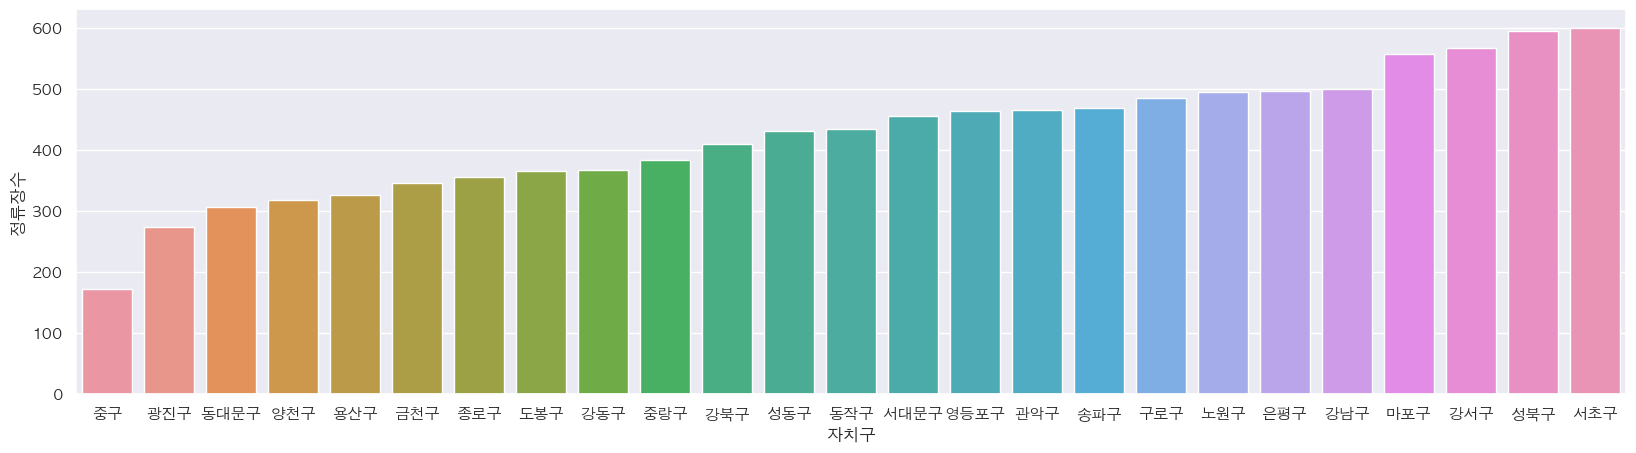

In [18]:
plt.figure(figsize=(20,5))
df_table = df_table.sort_values('정류장수')
sns.barplot(x='자치구', y='정류장수',data=df_table)
plt.savefig('자치구,정류장수.png')

## 3.이변량 분석
* 유의수준 : 5%
* 숫자 --> 숫자 : 상관분석
* 범주 --> 범주 : 카이제곱검정
* 범주 --> 숫자 : t검정, 분산분석
* 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value
    
상관계수 (우리가 배운 기준)
- 0.5 ~ 1 : 강한
- 0.2 ~ 0.5 : 중간
- 0.1 ~ 0.2 : 약간
- 0 ~ 0.1 : 없음
- 음수 똑같음 

In [19]:
import pandas as pd
import scipy.stats as stats

df_table.to_csv('table.csv')

statistic,pvalue = stats.pearsonr(df_table['넓이'],df_table['정류장수'])
print('넓이  정류장수  :',statistic,pvalue )
statistic,pvalue = stats.pearsonr(df_table['넓이'],df_table['평균 이동 시간(분)'])
print('넓이 평균 이동 시간(분)  :',statistic,pvalue )
statistic,pvalue = stats.pearsonr(df_table['정류장수'],df_table['평균 이동 시간(분)'])
print('정류장수 평균 이동 시간(분)  :',statistic,pvalue )
statistic,pvalue = stats.pearsonr(df_table['노선수'],df_table['평균 이동 시간(분)'])
print('노선수 평균 이동 시간(분)  :',statistic,pvalue )


넓이  정류장수  : 0.7258192797459022 4.01709769768881e-05
넓이 평균 이동 시간(분)  : 0.4495437631769537 0.02416223756324472
정류장수 평균 이동 시간(분)  : 0.5370492679329872 0.005637166048056469
노선수 평균 이동 시간(분)  : 0.12117796893125948 0.5639369832521209


 1) 자치구 면적이 클 수록 이동 시간이 크다.
 2) 정류장수가 많을 수록 이동시간이 크다.
 3) 면적이 클 수록  정류장수가 많다.

### 상관계수, HeatMap으로 시각화

In [20]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

spst.pearsonr(X,Y)

NameError: name 'X' is not defined

In [44]:
h_map = df_table.iloc[:, 1:].corr()

print(h_map)


                 정류장수       노선수        넓이  평균 이동 시간(분)   이동인구(합)      총노선수
정류장수         1.000000  0.276810  0.725819     0.537049  0.451854  0.326599
노선수          0.276810  1.000000  0.054202     0.121178  0.002243  0.944340
넓이           0.725819  0.054202  1.000000     0.449544  0.723771  0.225136
평균 이동 시간(분)  0.537049  0.121178  0.449544     1.000000  0.676133  0.244735
이동인구(합)      0.451854  0.002243  0.723771     0.676133  1.000000  0.178045
총노선수         0.326599  0.944340  0.225136     0.244735  0.178045  1.000000


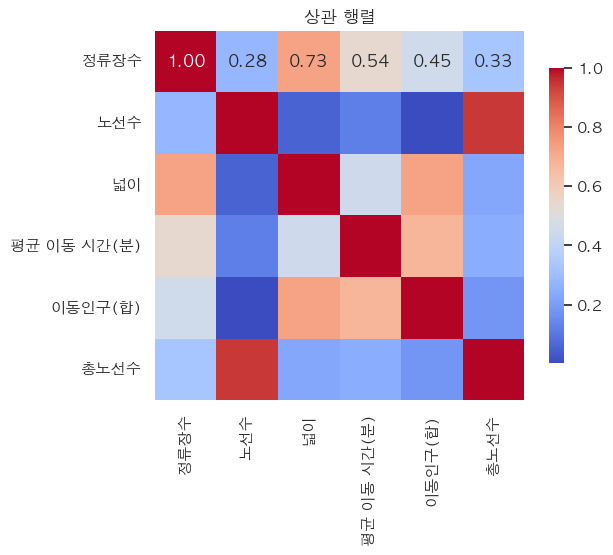

In [45]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
sns.heatmap(h_map, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("상관 행렬")
plt.show()

In [40]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 자치구별 정류장수가 많을 수록 평균 이동 시간이 크다.
# 2. 자치구별 정류장수가 많을 수록 넓이가 크다.
# 3. 자치구 넓이와 평균 이동 시간간의 약한 선형관계를 가진다.

## 4.관계 정리

### 1) 강한 관계의 변수

- 넓이, 정류장수

### 2) 약한 관계의 변수

- 평균 이동 시간, 정류장수
- 평균 이동 시간, 넓이

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가?

- 면적이 작고, 정류장수도 적으나 평균 이동 시간이 제일 긴 영등포구에 정류장을 설치하는 것이 바람직하다.